In [46]:
# This tutorial demonstrates classification using a small 2-layer Neural Network using Pytorch's sequential module

In [47]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn as nn

In [48]:
# Create toy classification data
torch.manual_seed(1)
num_data = torch.ones(100, 2)
x0 = torch.normal(2 * num_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * num_data, 1)
y1 = torch.ones(100)

In [49]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1),).type(torch.LongTensor)
x, y = Variable(x), Variable(y)

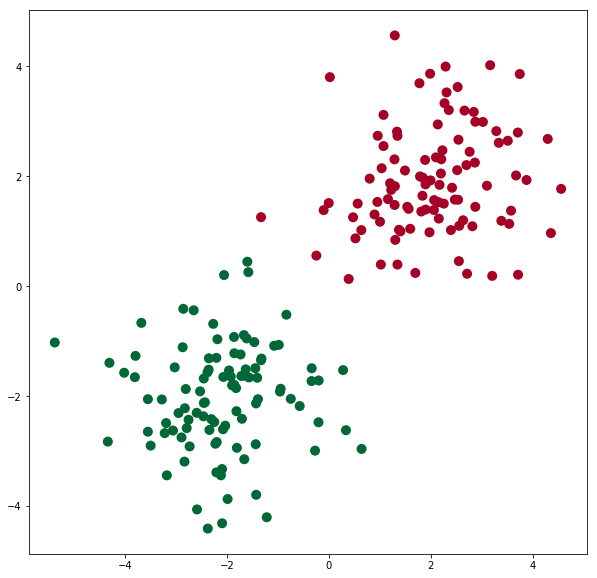

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [51]:
# define the neural network using pytorch's sequential module
net = nn.Sequential(
                        nn.Linear(2, 10),
                        nn.ReLU(),
                        nn.Linear(10, 2)
                   )

In [52]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_fn = torch.nn.CrossEntropyLoss()

In [53]:
for e in range(5000):
    y_pred = net(x)
    optimizer.zero_grad()
    loss = loss_fn(y_pred, y)
    if e % 100 == 0:
        print("Loss after epoch: " + str(e) + " is: " + str(loss))
    loss.backward()
    optimizer.step()
    

Loss after epoch: 0 is: tensor(0.8460)
Loss after epoch: 100 is: tensor(1.00000e-02 *
       2.8319)
Loss after epoch: 200 is: tensor(1.00000e-02 *
       1.4804)
Loss after epoch: 300 is: tensor(1.00000e-02 *
       1.0283)
Loss after epoch: 400 is: tensor(1.00000e-03 *
       7.9647)
Loss after epoch: 500 is: tensor(1.00000e-03 *
       6.5305)
Loss after epoch: 600 is: tensor(1.00000e-03 *
       5.5449)
Loss after epoch: 700 is: tensor(1.00000e-03 *
       4.8248)
Loss after epoch: 800 is: tensor(1.00000e-03 *
       4.2965)
Loss after epoch: 900 is: tensor(1.00000e-03 *
       3.8776)
Loss after epoch: 1000 is: tensor(1.00000e-03 *
       3.5363)
Loss after epoch: 1100 is: tensor(1.00000e-03 *
       3.2524)
Loss after epoch: 1200 is: tensor(1.00000e-03 *
       3.0124)
Loss after epoch: 1300 is: tensor(1.00000e-03 *
       2.8063)
Loss after epoch: 1400 is: tensor(1.00000e-03 *
       2.6272)
Loss after epoch: 1500 is: tensor(1.00000e-03 *
       2.4700)
Loss after epoch: 1600 is

In [54]:
_, predictions = torch.max(F.sigmoid(net(x)), 1)

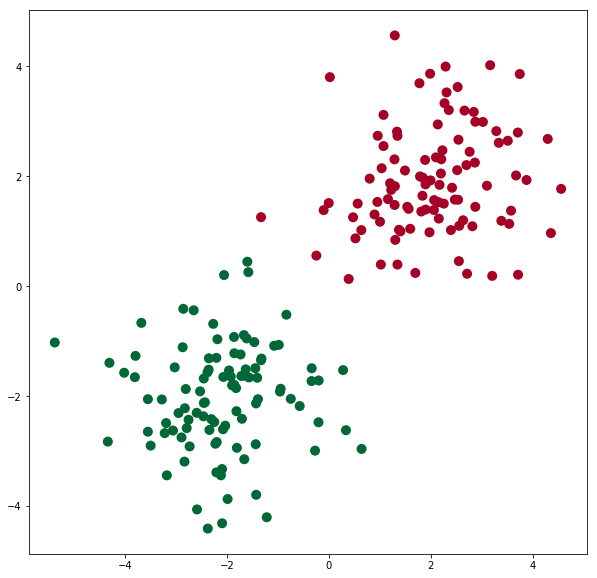

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=predictions.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [56]:
# save the model
torch.save(net, 'model.pkl')
torch.save(net.state_dict(), 'model_params.pkl')